In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab Notebooks/adult

/content/drive/MyDrive/Colab Notebooks/adult


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv('adult.data', na_values=[' ?'], index_col = False, sep=',', names = ['age','workclass','fnlwght', 'education', 'education_num','marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df

,age,workclass,fnlwght,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


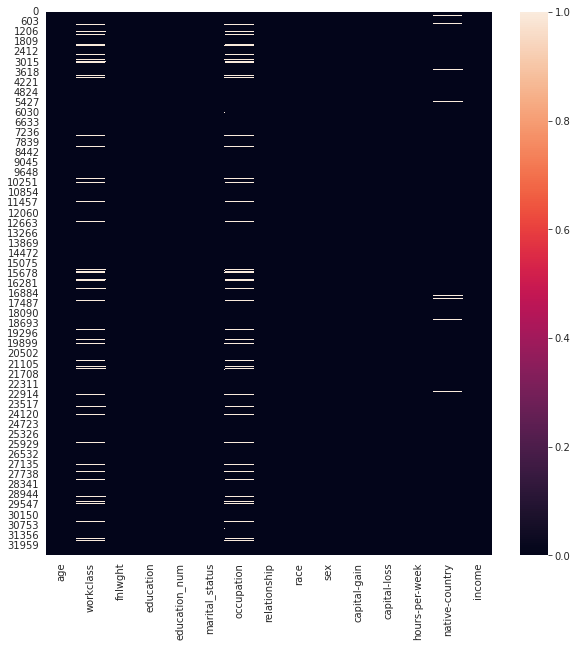

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna()) # show null values, white lines mean null values
plt.show()

# Null Removal

In [ ]:
df=df.dropna() # remove all null values

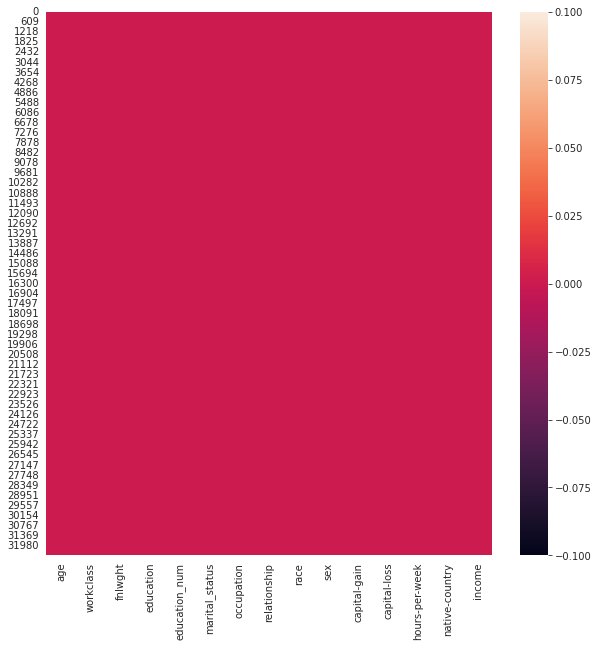

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

# Train test split

In [ ]:
X=df.drop(['income'],axis=1)
y=df[['income']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42) # split dataset into training and testing set
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.15,random_state=42) # split training set into training set and validation set

In [ ]:
(x_train.shape,x_val.shape,x_test.shape) # training set, validation set, testing set

((21791, 14), (3846, 14), (4525, 14))

# Data Preprocessing

In [ ]:
# transfom categorical columns into numerical values using one-hot-encoding method
oh=ColumnTransformer([
    ('encoder',OneHotEncoder(drop='first',sparse=False),
     ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'])
],remainder='passthrough')

# pipeline: connect multiple processing methods into single pipeline, in our case, one hot encoding and standard scaler
pipeline=Pipeline([
    ('encoder',oh),
    ('scaler',StandardScaler())
])

In [ ]:
x_train=pipeline.fit_transform(x_train)
x_test=pipeline.transform(x_test)
x_val=pipeline.transform(x_val)

In [ ]:
(x_train.shape,x_val.shape,x_test.shape)

((21791, 96), (3846, 96), (4525, 96))

In [ ]:
o1=OneHotEncoder(sparse=False)
y_train=o1.fit_transform(y_train)
y_val=o1.transform(y_val)
y_test=o1.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input, Conv1D, MaxPool1D, Flatten, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import expand_dims

e=EarlyStopping(patience=5,restore_best_weights=True)
num_layers_mult=2

n=num_layers_mult

# First model, DNN with 3 hidden layers

In [ ]:
model=Sequential()

model.add(Input(shape=(x_train.shape[1],)))

model.add(Dense(x_train.shape[1],activation='relu'))#,input_shape=(x_train.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(n*x_train.shape[1],activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n*x_train.shape[1],activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                9312      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 192)               18624     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 192)               37056     
                                                                 
 dense_3 (Dense)             (None, 2)                 386       
                                                                 
Total params: 65,378
Trainable params: 65,378
Non-traina

In [ ]:
results=model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[e],epochs=100)

Epoch 1/100
681/681 [==============================] - 5s 4ms/step - loss: 0.3951 - accuracy: 0.8162 - val_loss: 0.3382 - val_accuracy: 0.8450
Epoch 2/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3478 - accuracy: 0.8395 - val_loss: 0.3345 - val_accuracy: 0.8489
Epoch 3/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3352 - accuracy: 0.8465 - val_loss: 0.3226 - val_accuracy: 0.8487
Epoch 4/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3280 - accuracy: 0.8504 - val_loss: 0.3245 - val_accuracy: 0.8484
Epoch 5/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3236 - accuracy: 0.8518 - val_loss: 0.3195 - val_accuracy: 0.8510
Epoch 6/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3200 - accuracy: 0.8526 - val_loss: 0.3237 - val_accuracy: 0.8528
Epoch 7/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3151 - accuracy: 0.8548 - val_loss: 0.3240 - val_accuracy: 0.8476

In [ ]:
model.evaluate(x_test,y_test)

142/142 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8519


[0.31967249512672424, 0.8519337177276611]

In [ ]:
pred1=np.argmax(model.predict(x_test), axis=-1)
pred1

142/142 [==============================] - 1s 3ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test[:,1],pred1))

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      3401
         1.0       0.73      0.64      0.68      1124

    accuracy                           0.85      4525
   macro avg       0.81      0.78      0.79      4525
weighted avg       0.85      0.85      0.85      4525



# Modified first model, add one more hidden layer: 4 hidden layer DNN

In [ ]:
model2=Sequential()

model2.add(Input(shape=(x_train.shape[1],)))

model2.add(Dense(x_train.shape[1],activation='relu'))#,input_shape=(x_train.shape[1],)))
model2.add(Dropout(0.25))
model2.add(Dense(n*x_train.shape[1],activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(x_train.shape[1],activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(x_train.shape[1]/2,activation='relu'))

model2.add(Dense(2,activation='softmax'))


model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 96)                9312      
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 192)               18624     
                                                                 
 dropout_3 (Dropout)         (None, 192)               0         
                                                                 
 dense_6 (Dense)             (None, 96)                18528     
                                                                 
 dropout_4 (Dropout)         (None, 96)                0         
                                                                 
 dense_7 (Dense)             (None, 48)               

In [ ]:
results=model2.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[e],epochs=100)

Epoch 1/100
681/681 [==============================] - 3s 4ms/step - loss: 0.3916 - accuracy: 0.8180 - val_loss: 0.3369 - val_accuracy: 0.8453
Epoch 2/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8392 - val_loss: 0.3309 - val_accuracy: 0.8463
Epoch 3/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3355 - accuracy: 0.8458 - val_loss: 0.3236 - val_accuracy: 0.8502
Epoch 4/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3262 - accuracy: 0.8492 - val_loss: 0.3250 - val_accuracy: 0.8502
Epoch 5/100
681/681 [==============================] - 2s 4ms/step - loss: 0.3226 - accuracy: 0.8515 - val_loss: 0.3205 - val_accuracy: 0.8484
Epoch 6/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3174 - accuracy: 0.8531 - val_loss: 0.3211 - val_accuracy: 0.8521
Epoch 7/100
681/681 [==============================] - 2s 3ms/step - loss: 0.3147 - accuracy: 0.8552 - val_loss: 0.3207 - val_accuracy: 0.8536

In [ ]:
model2.evaluate(x_test,y_test)

142/142 [==============================] - 1s 5ms/step - loss: 0.3206 - accuracy: 0.8546


[0.3206293284893036, 0.8545856475830078]

In [ ]:
pred2=np.argmax(model2.predict(x_test), axis=-1)
pred2

142/142 [==============================] - 1s 3ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test[:,1],pred2))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      3401
         1.0       0.78      0.58      0.67      1124

    accuracy                           0.85      4525
   macro avg       0.82      0.76      0.79      4525
weighted avg       0.85      0.85      0.85      4525



# Method 2: CNN method

In [ ]:
# reshape data shape so that can fit into 1D Conv layer
train_sample_size =   x_train.shape[0]
train_time_step = x_train.shape[1]
dimension = 1

val_sample_size =   x_val.shape[ 0]
val_time_step = x_val.shape[1]
dimension = 1

test_sample_size =   x_test.shape[0]
test_time_step = x_test.shape[1]
dimension = 1

In [ ]:
x_train = x_train.reshape(train_sample_size, train_time_step, dimension)
x_val   = x_val.reshape(val_sample_size, val_time_step, dimension)

In [ ]:
x_test = x_test.reshape(test_sample_size, test_time_step, dimension)

In [ ]:
model = Sequential()
model.add(Input(shape=(np.shape(x_train)[1], 1)))
model.add(Conv1D(filters = 128, kernel_size=7,activation='relu'))
model.add(Dropout(0.5))
model.add(Conv1D(filters = 64, kernel_size=3,activation='relu'))
model.add(Conv1D(filters = 32, kernel_size=2,activation='relu'))

model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_53 (Conv1D)          (None, 90, 128)           1024      
                                                                 
 dropout_34 (Dropout)        (None, 90, 128)           0         
                                                                 
 conv1d_54 (Conv1D)          (None, 88, 64)            24640     
                                                                 
 conv1d_55 (Conv1D)          (None, 87, 32)            4128      
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 43, 32)           0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1376)              0         
                                                     

In [ ]:
results=model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[e],epochs=100)

Epoch 1/100
681/681 [==============================] - 11s 5ms/step - loss: 0.3913 - accuracy: 0.8166 - val_loss: 0.3523 - val_accuracy: 0.8357
Epoch 2/100
681/681 [==============================] - 3s 5ms/step - loss: 0.3527 - accuracy: 0.8365 - val_loss: 0.3388 - val_accuracy: 0.8424
Epoch 3/100
681/681 [==============================] - 3s 5ms/step - loss: 0.3448 - accuracy: 0.8402 - val_loss: 0.3299 - val_accuracy: 0.8482
Epoch 4/100
681/681 [==============================] - 3s 5ms/step - loss: 0.3389 - accuracy: 0.8448 - val_loss: 0.3429 - val_accuracy: 0.8422
Epoch 5/100
681/681 [==============================] - 3s 5ms/step - loss: 0.3354 - accuracy: 0.8466 - val_loss: 0.3257 - val_accuracy: 0.8492
Epoch 6/100
681/681 [==============================] - 3s 5ms/step - loss: 0.3321 - accuracy: 0.8471 - val_loss: 0.3230 - val_accuracy: 0.8518
Epoch 7/100
681/681 [==============================] - 3s 5ms/step - loss: 0.3294 - accuracy: 0.8477 - val_loss: 0.3242 - val_accuracy: 0.850

In [ ]:
model.evaluate(x_test,y_test)

142/142 [==============================] - 1s 6ms/step - loss: 0.3218 - accuracy: 0.8586


[0.32183927297592163, 0.8585635423660278]

In [ ]:
pred3=np.argmax(model.predict(x_test), axis=-1)
pred3
print(classification_report(y_test[:,1],pred3))

142/142 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      3401
         1.0       0.75      0.64      0.69      1124

    accuracy                           0.86      4525
   macro avg       0.82      0.79      0.80      4525
weighted avg       0.85      0.86      0.85      4525



In [ ]:
# using CNN, accuracy increase by 1%